In [1]:
import sys, os
sys.path.append(os.getcwd() + "/../")
import src.configs.default_config as cfg
import src.modelling.model as model
from src.processing import dataset_builder
from src.visualization import visualization
import numpy as np
from src.configs.storage_config import TRAIN_TFRECORDS, VALID_TFRECORDS

In [2]:
model_ds=model.ModelDatasetComponent(cfg)

In [5]:
train_tfrecords = dataset_builder.get_tfrecord_filenames(TRAIN_TFRECORDS)
#print(train_tfrecords)

Retrieving TFrecords from: C:\Users\lhuertas\OneDrive - ENDAVA\Smart_move\model\notebooks/../data/TFrecords/training/


In [6]:
model_ds_component = model.ModelDatasetComponent(cfg)
ds = dataset_builder.build_training_ds(train_tfrecords, model_ds_component.place_training_labels, cfg)

In [7]:
ds

<PrefetchDataset shapes: (((None, 368, 368, 3), (None, 46, 46, 1)), ((None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 35), (None, 46, 46, 19), (None, 46, 46, 19))), types: ((tf.float32, tf.float32), (tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32))>

In [46]:
def remove_mask(inp):
    return inp[...,:-1]

def decmopose_ds_elem(st,idx):
    img=st[0][0][idx:idx+1].numpy()
    paf=st[1][3][idx:idx+1].numpy()
    kpt=st[1][5][idx:idx+1].numpy()
    
    paf=remove_mask(paf)
    kpt=remove_mask(kpt)
    return img,(paf,),(kpt,)

it=iter(ds)
st=next(it)
idx=0
joint_num=-1

In [47]:
img,(paf,),(kpt,)=decmopose_ds_elem(st,idx)
print(img.shape)
print(paf.shape)
print(kpt.shape)

(1, 368, 368, 3)
(1, 46, 46, 34)
(1, 46, 46, 18)


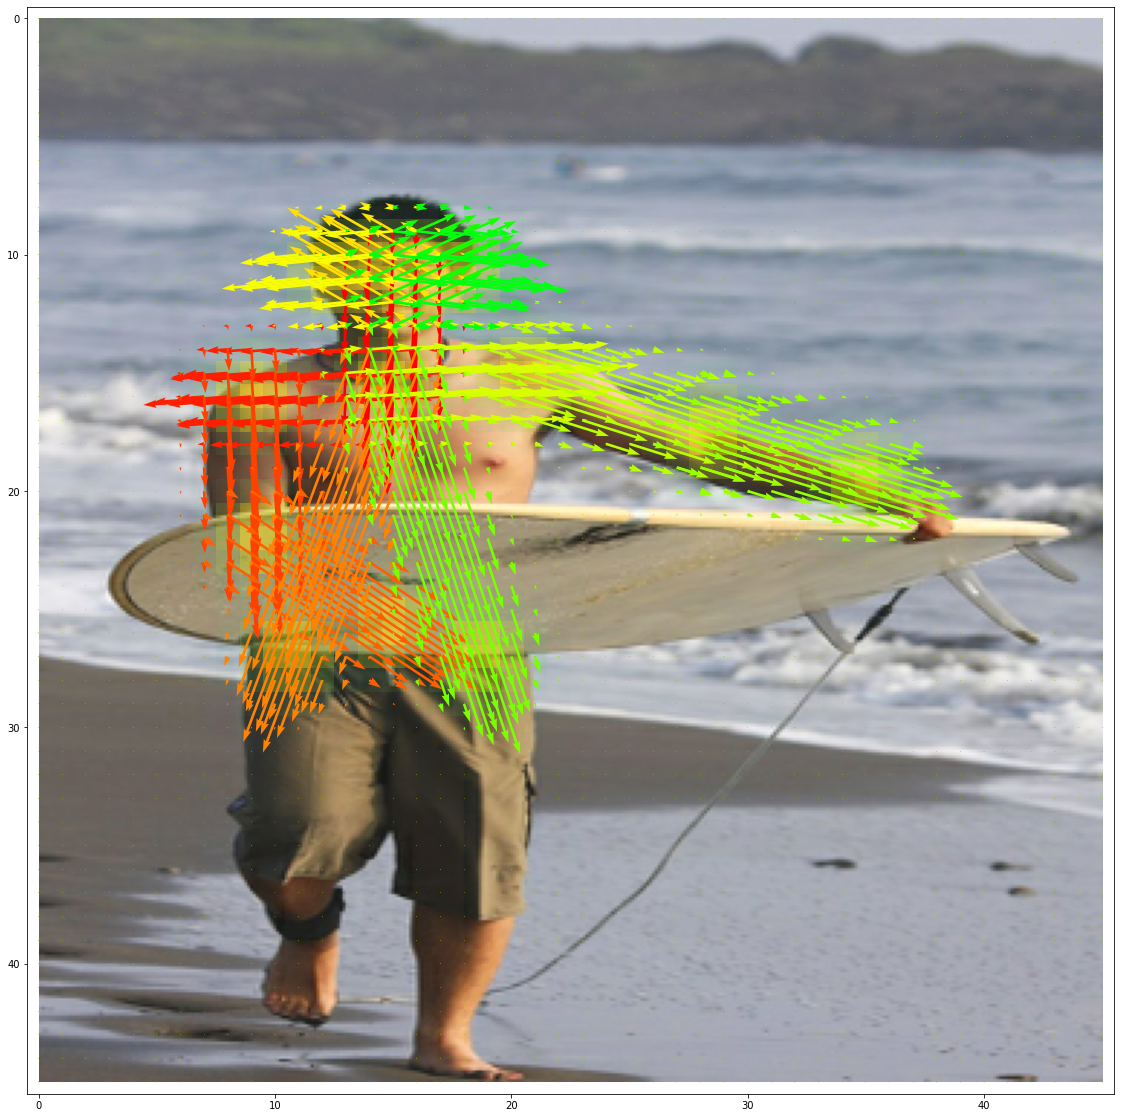

In [50]:
visualization.show_img_pafs_kpts(img,paf,kpt,figure_size=20)

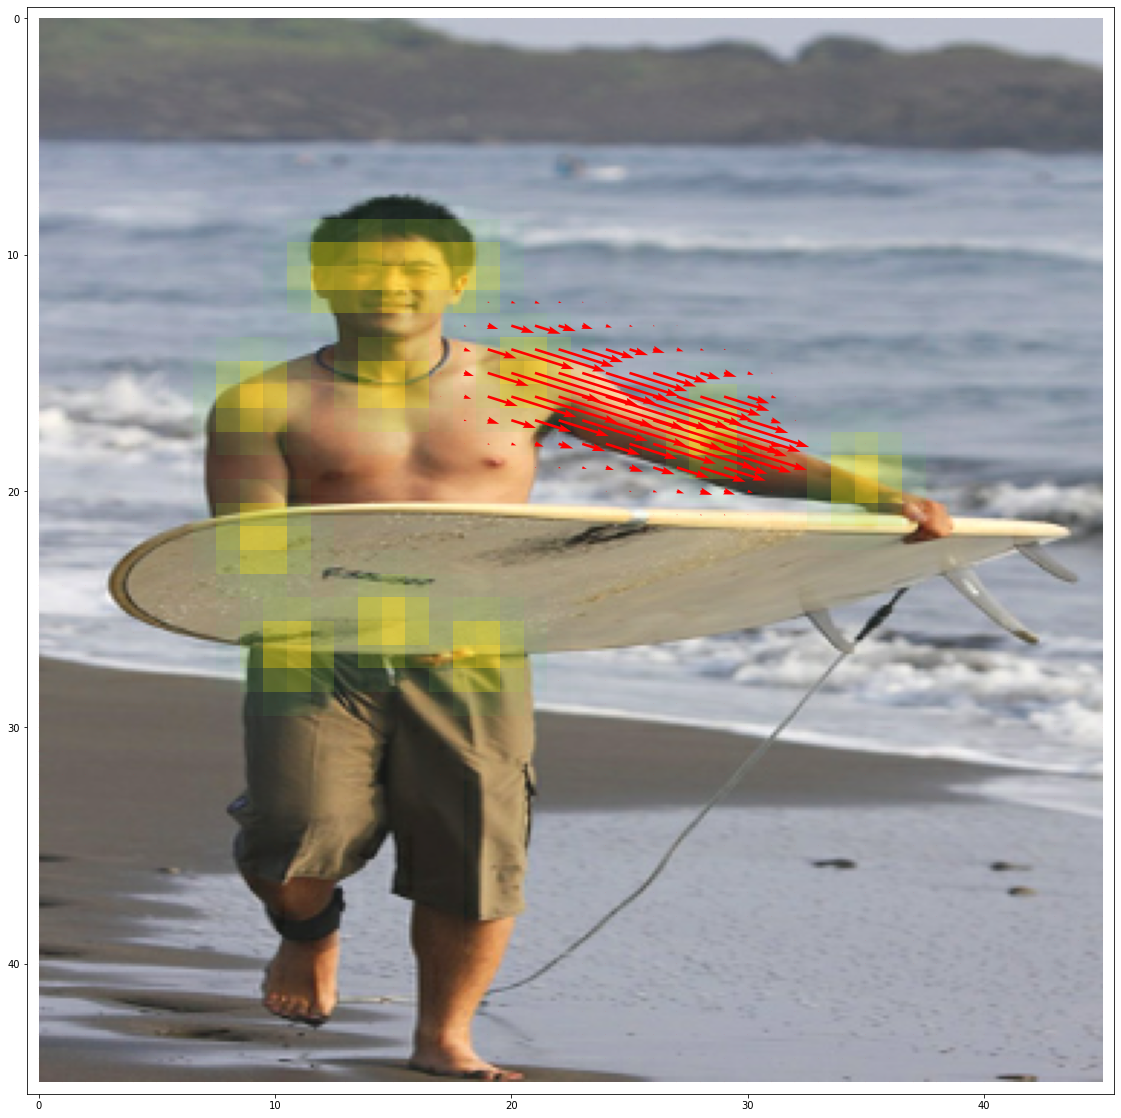

In [51]:
def extract_single_paf(paf,idx):
    ldim=int(paf.shape[-1]/2)
    return np.stack([paf[...,idx],paf[...,idx+ldim]],axis=-1)
    #return paf[...,idx]
#img,(paf,),(kpt,)=decmopose_ds_elem(st,idx)
joint_num=10
if joint_num>0:single_paf=extract_single_paf(paf,joint_num)
#if joint_num>0:kpt=kpt[...,x:x+1]
visualization.show_img_pafs_kpts(img,single_paf,kpt,figure_size=20)

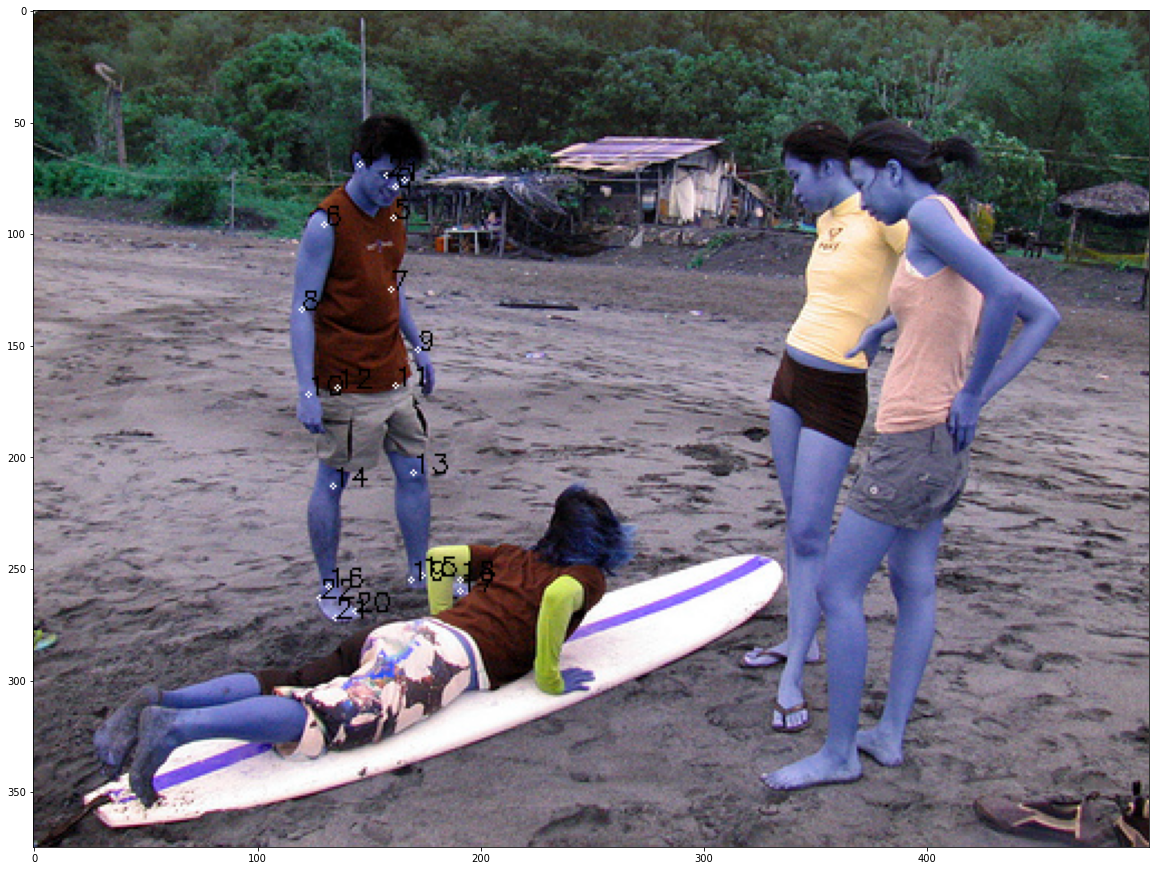

In [2]:
from src.configs import draw_config
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import cv2
urlretrieve("http://images.cocodataset.org/train2017/000000524173.jpg", "f.jpg")

# read the image file in a numpy array
image = cv2.imread("f.jpg")
keypoints = [162,79,2,166,76,2,158,74,2,0,0,0,146,69,2,161,93,2,130,96,2,160,125,2,120,134,2,172,152,2,123,172,2,162,168,2,136,169,2,170,207,2,134,213,2,174,253,2,132,258,2,191,260,2,191,255,2,169,255,2,144,269,2,135,272,2,128,263,2],
keypoints = np.array(keypoints).reshape((23,3))

visualization.draw_skeleton(image,keypoints,figure_size=20)


#skeleton = visualization.SkeletonDrawer(image,draw_config)
#skeleton.kpt_draw((x[0],y[0]), "name")


In [56]:
kpt.shape

(1, 46, 46, 18)